In [1]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_prac.yaml"

In [23]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes
import random
import seaborn as sns
from tqdm.notebook import tqdm

sys.path.append(PROJECT_PATH)
from utils.data import Dataset

In [3]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:13<00:00, 10.33it/s]


In [21]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

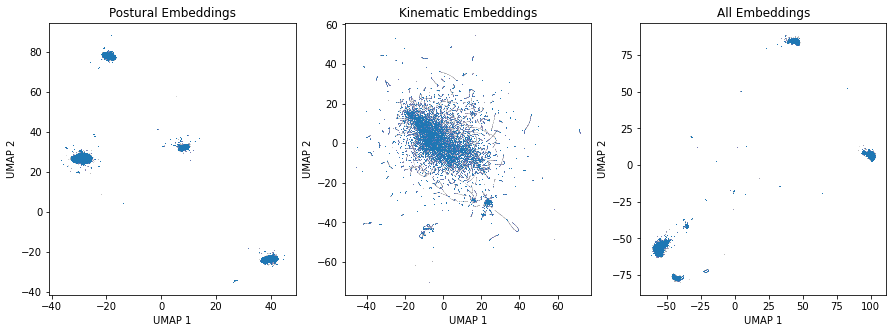

In [5]:
fig_all_embed, ax_all_embed = plt.subplots(1,3,figsize=(15,5))

ax_all_embed[0].scatter(all_postural_embed[:,0], all_postural_embed[:,1], s=1, alpha=0.005)
ax_all_embed[0].set(title="Postural Embeddings", xlabel="UMAP 1", ylabel="UMAP 2")

ax_all_embed[1].scatter(all_kinematic_embed[:,0], all_kinematic_embed[:,1], s=1, alpha=0.005)
ax_all_embed[1].set(title="Kinematic Embeddings", xlabel="UMAP 1", ylabel="UMAP 2")

ax_all_embed[2].scatter(all_embed[:,0], all_embed[:,1], s=1, alpha=0.005)
ax_all_embed[2].set(title="All Embeddings", xlabel="UMAP 1", ylabel="UMAP 2")

plt.show()

In [6]:
# SETUP

# not used:
ax_post_x_length = np.diff(ax_all_embed[0].get_xlim())[0]
ax_post_y_length = np.diff(ax_all_embed[0].get_ylim())[0]

ax_kin_x_length = np.diff(ax_all_embed[1].get_xlim())[0]
ax_kin_y_length = np.diff(ax_all_embed[1].get_ylim())[0]

# not used:
ax_all_x_length = np.diff(ax_all_embed[2].get_xlim())[0]
ax_all_y_length = np.diff(ax_all_embed[2].get_ylim())[0]

def fix_aspect_ratio(xlim, ylim):
    d = np.diff(xlim)[0]*ax_kin_y_length/ax_kin_x_length - np.diff(ylim)[0]
    return xlim, (ylim[0]-d/2, ylim[1]+d/2)

def plot_embedding(embed, xlim, ylim, frac_pts=1/3, scatter_s=1, scatter_alpha=0.04, 
                   kde_gridsize=200, cross=False):
    num_fr = len(embed)
    idx = random.choices(np.arange(num_fr), k=int(num_fr*frac_pts))
    
    # scatter plot
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    ax[0].scatter(embed[idx,0], embed[idx,1], s=scatter_s, alpha=scatter_alpha)
    ax[0].set(xlabel="UMAP C1", ylabel="UMAP C2", title="Features Embeddings Scatter", xlim=xlim, ylim=ylim)
    
    if cross != False:
        ax[0].axvline(x=cross[0], color='r', alpha=0.5)
        ax[0].axvline(x=cross[1], color='r', alpha=0.5)
        ax[0].axhline(y=cross[2], color='r', alpha=0.5)
        ax[0].axhline(y=cross[3], color='r', alpha=0.5)
    
    #density plot
    sns.kdeplot(x=embed[idx,0], y=embed[idx,1],
                shade=True, thresh=0, gridsize=kde_gridsize, bw_adjust=0.3,
                levels=100, cmap='viridis', cbar=False, ax=ax[1])
    ax[1].set(xlabel="UMAP C1", ylabel="UMAP C2", title="Features Embedding Density",
              facecolor='#440054', xlim=xlim, ylim=ylim)
    
    plt.show()

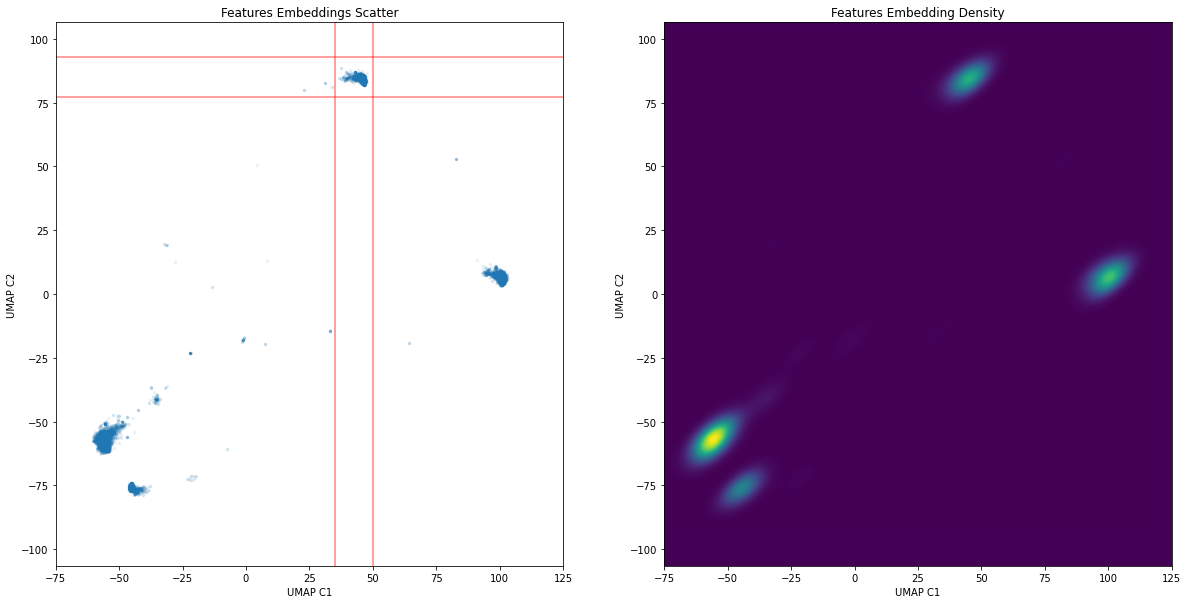

In [219]:
region_x_lim, region_y_lim = (-75,125), (-100,100)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.075, 
               kde_gridsize=200, cross=(35,50,77,93))

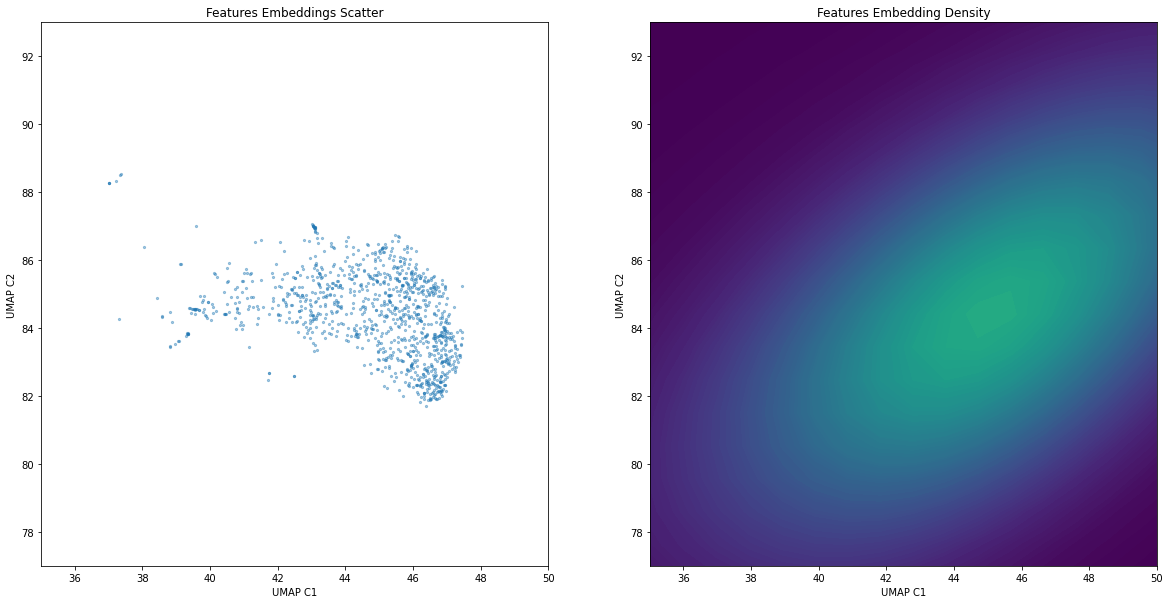

In [220]:
region_x_lim, region_y_lim = (35,50), (80,90)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.4, 
               kde_gridsize=200)

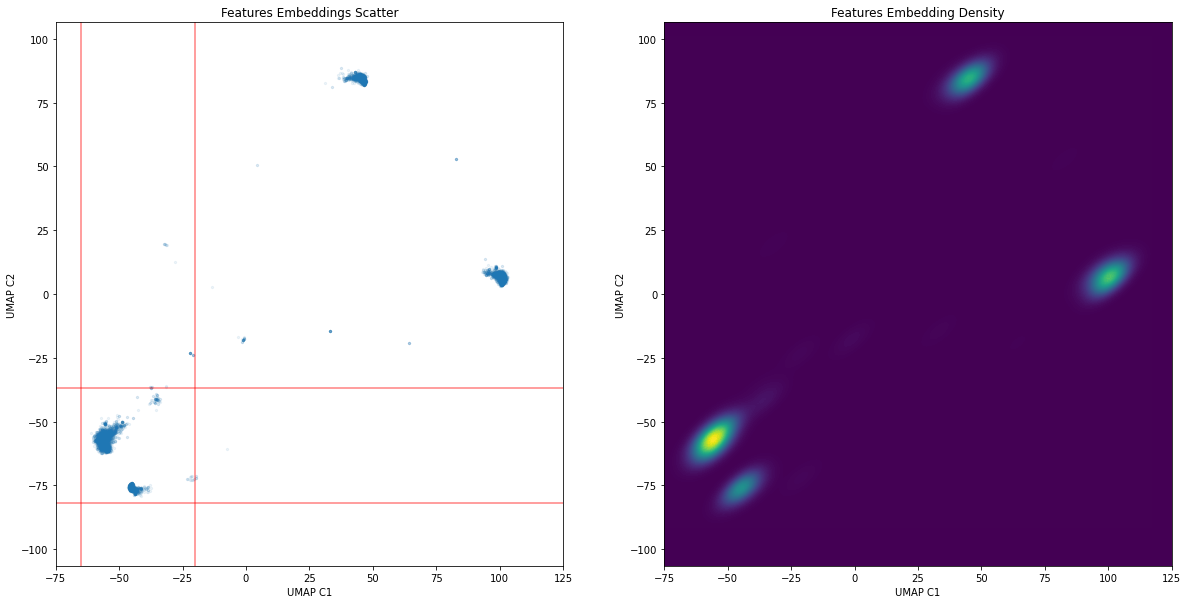

In [221]:
region_x_lim, region_y_lim = (-75,125), (-100,100)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.075, 
               kde_gridsize=200, cross=(-65,-20,-82,-37))

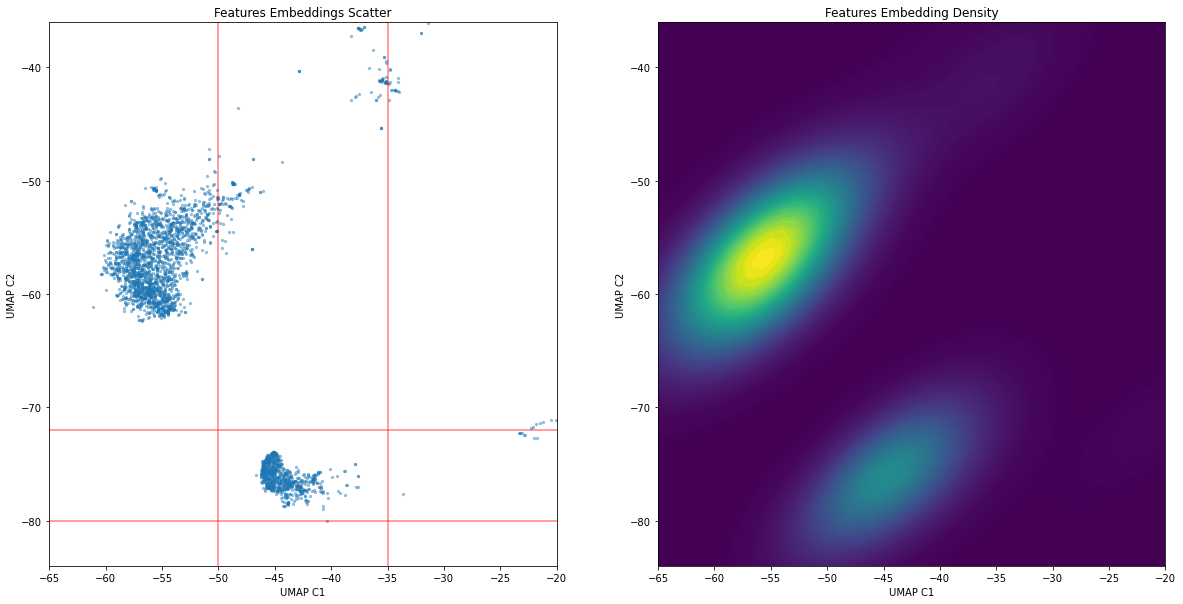

In [213]:
region_x_lim, region_y_lim = (-65,-20), (-90,-30)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.4, 
               kde_gridsize=200, cross=(-50,-35,-80,-72))

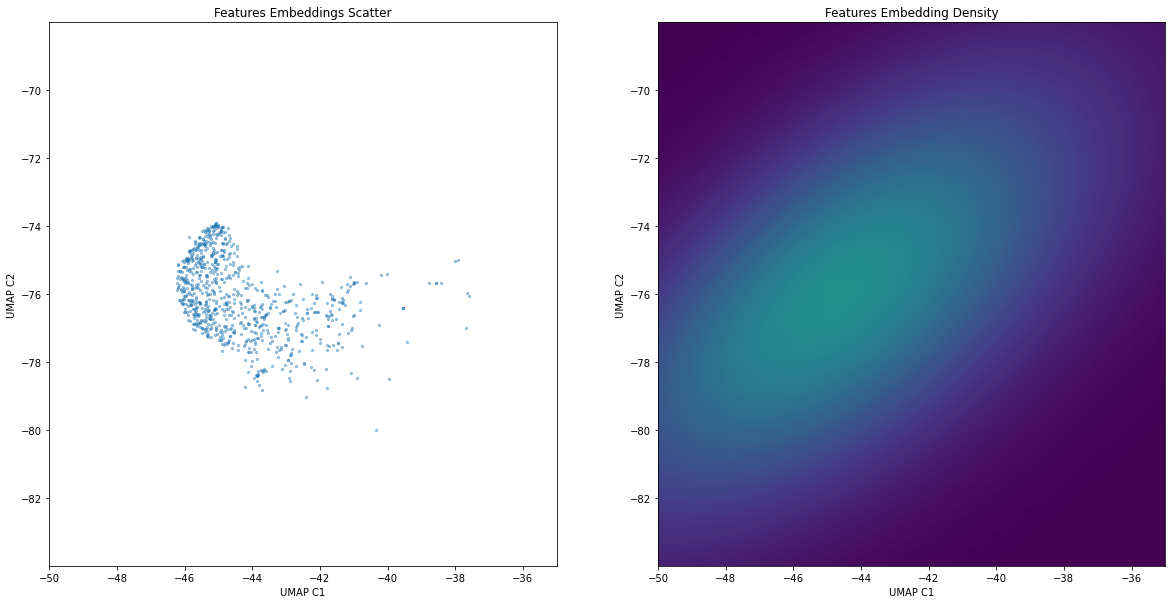

In [222]:
region_x_lim, region_y_lim = (-50,-35), (-80,-72)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.4, 
               kde_gridsize=200)

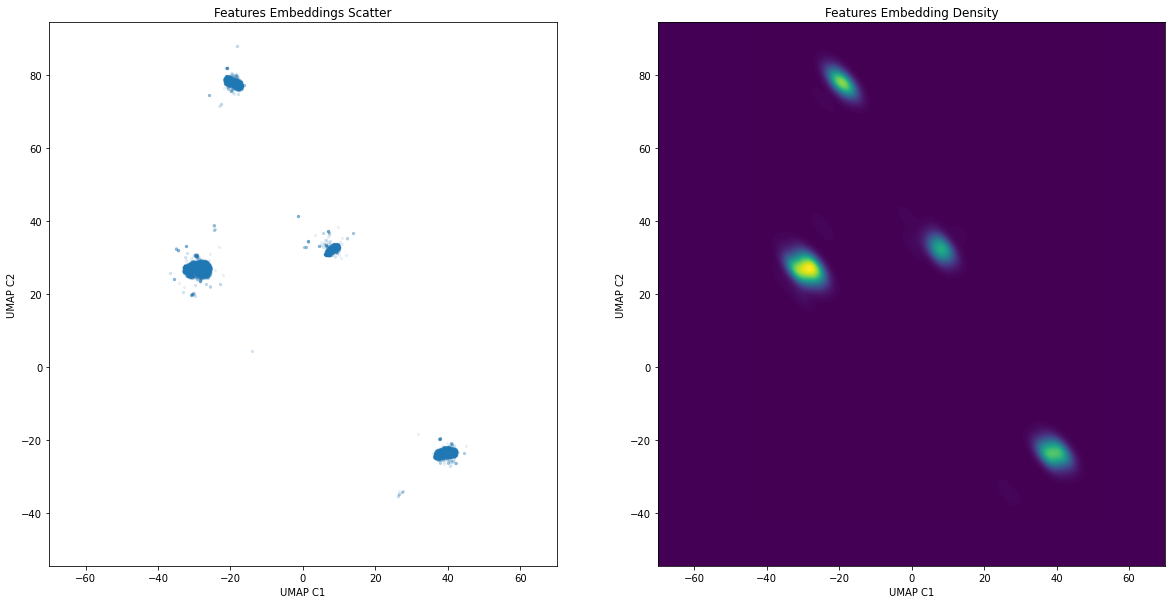

In [223]:
region_x_lim, region_y_lim = (-70,70), (-50,90)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_postural_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.075, 
               kde_gridsize=200)

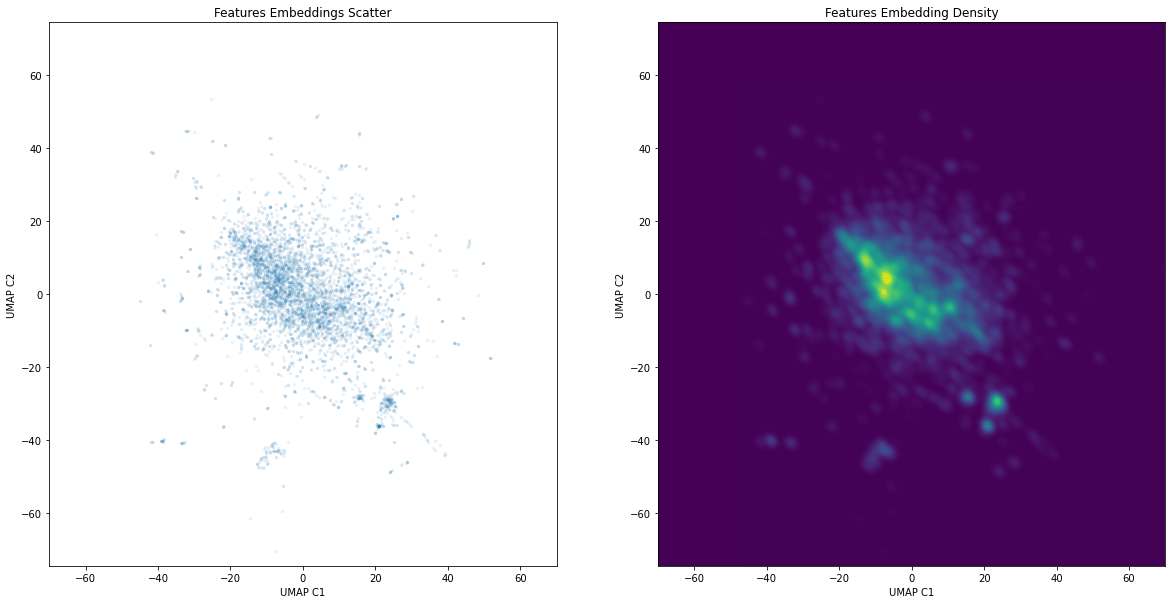

In [230]:
region_x_lim, region_y_lim = (-70,70), (-70,70)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

plot_embedding(all_kinematic_embed, region_x_lim, region_y_lim, 
               frac_pts=1/100, scatter_s=5, scatter_alpha=0.075, 
               kde_gridsize=200)

In [16]:
max_freq, min_freq = 1/config['period_min'], 1/config['period_max']
freq = max_freq*2**(-1*np.log2(max_freq/min_freq)*
    (np.arange(config['f_bin'],0,-1)-1)/(config['f_bin']-1)) # dyadic frequency bins

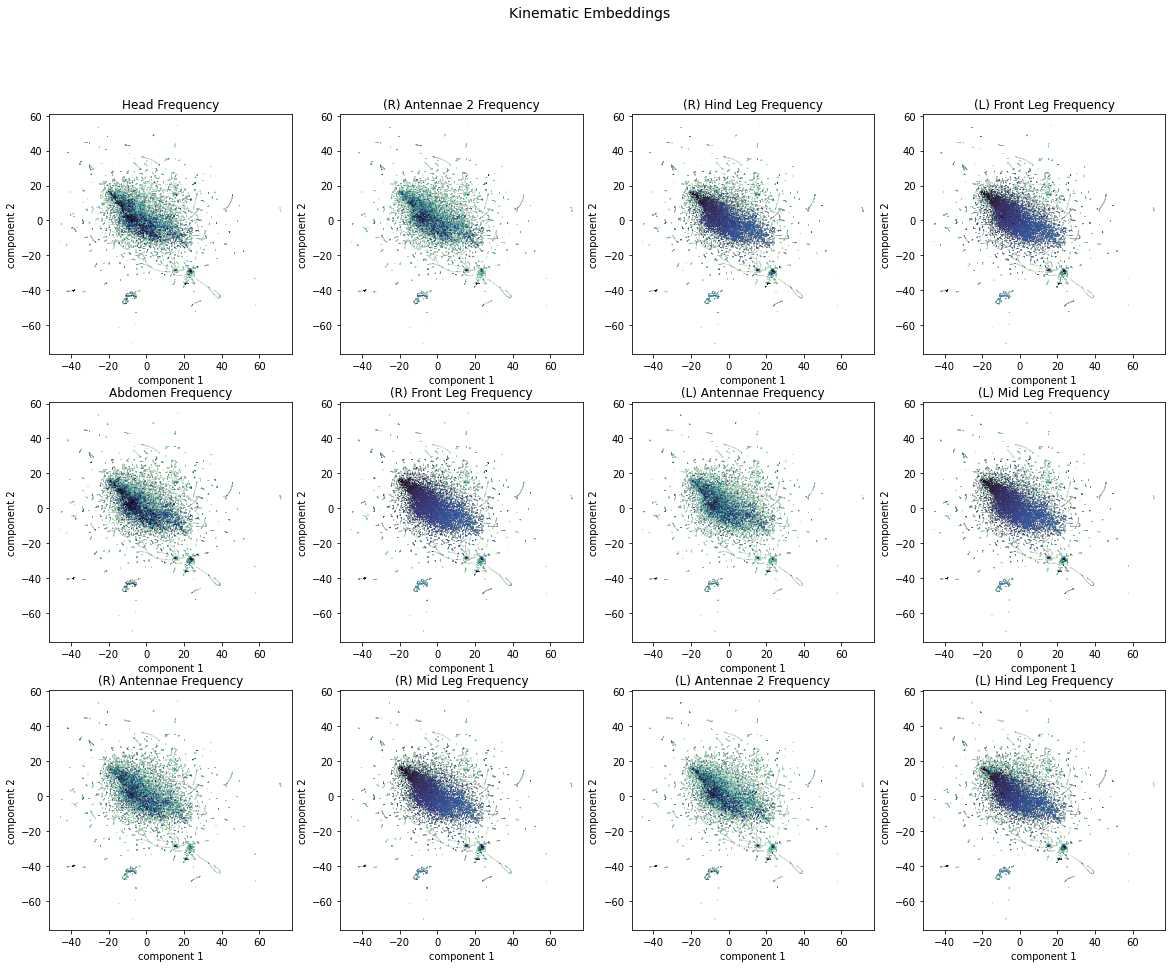

In [32]:
# figure info
max_freq_idx = np.argmax(angle_power[:,:,:], axis=1)
max_freq = freq[max_freq_idx]
num_freq = len(freq)

# freq color scheme
freq_color_palette = sns.color_palette('mako_r', num_freq)
cmap1, norm1 = matplotlib.colors.from_levels_and_colors(freq, freq_color_palette, 
                                                        extend='max')
# kinematic embedding figures
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for angle_idx in tqdm(range(12)):
    fig_title = f"{config['angle_labels'][angle_idx]} Frequency"
    freq_cluster_colors = np.array([freq_color_palette[f] for f in max_freq_idx[:,angle_idx]])
    ax[angle_idx%3, angle_idx//3].scatter(all_kinematic_embed[:,0], all_kinematic_embed[:,1], 
                                          color=freq_cluster_colors, alpha=0.005, s=0.5)
    ax[angle_idx%3, angle_idx//3].set(xlabel='component 1', ylabel='component 2', title=fig_title)
    
plt.suptitle("Kinematic Embeddings", fontsize=14)
plt.show()

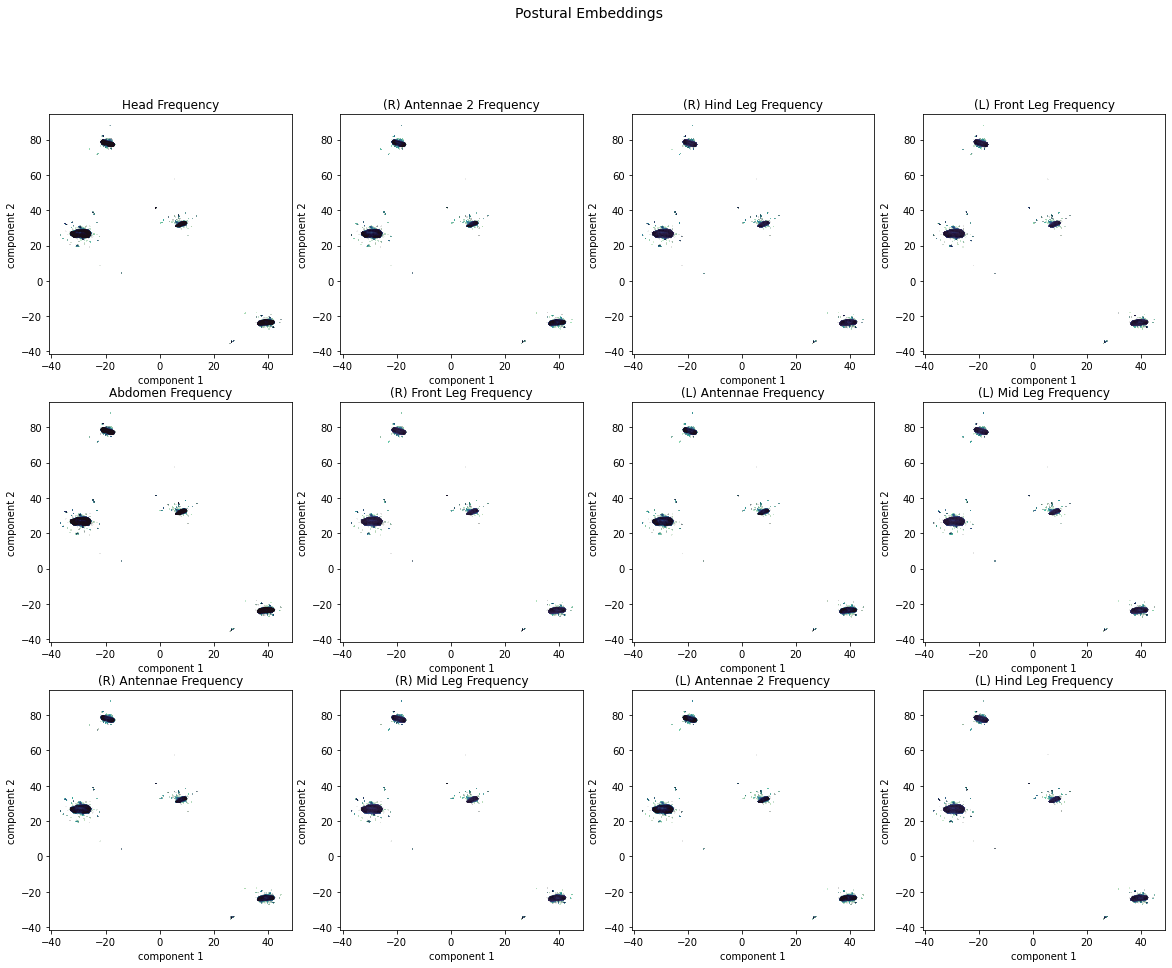

In [29]:
# figures
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for angle_idx in tqdm(range(12)):
    fig_title = f"{config['angle_labels'][angle_idx]} Frequency"
    freq_cluster_colors = np.array([freq_color_palette[f] for f in max_freq_idx[:,angle_idx]])
    ax[angle_idx%3, angle_idx//3].scatter(all_postural_embed[:,0], all_postural_embed[:,1], 
                                          color=freq_cluster_colors, alpha=0.005, s=0.5)
    ax[angle_idx%3, angle_idx//3].set(xlabel='component 1', ylabel='component 2', title=fig_title)
    
plt.suptitle("Postural Embeddings", fontsize=14)
plt.show()

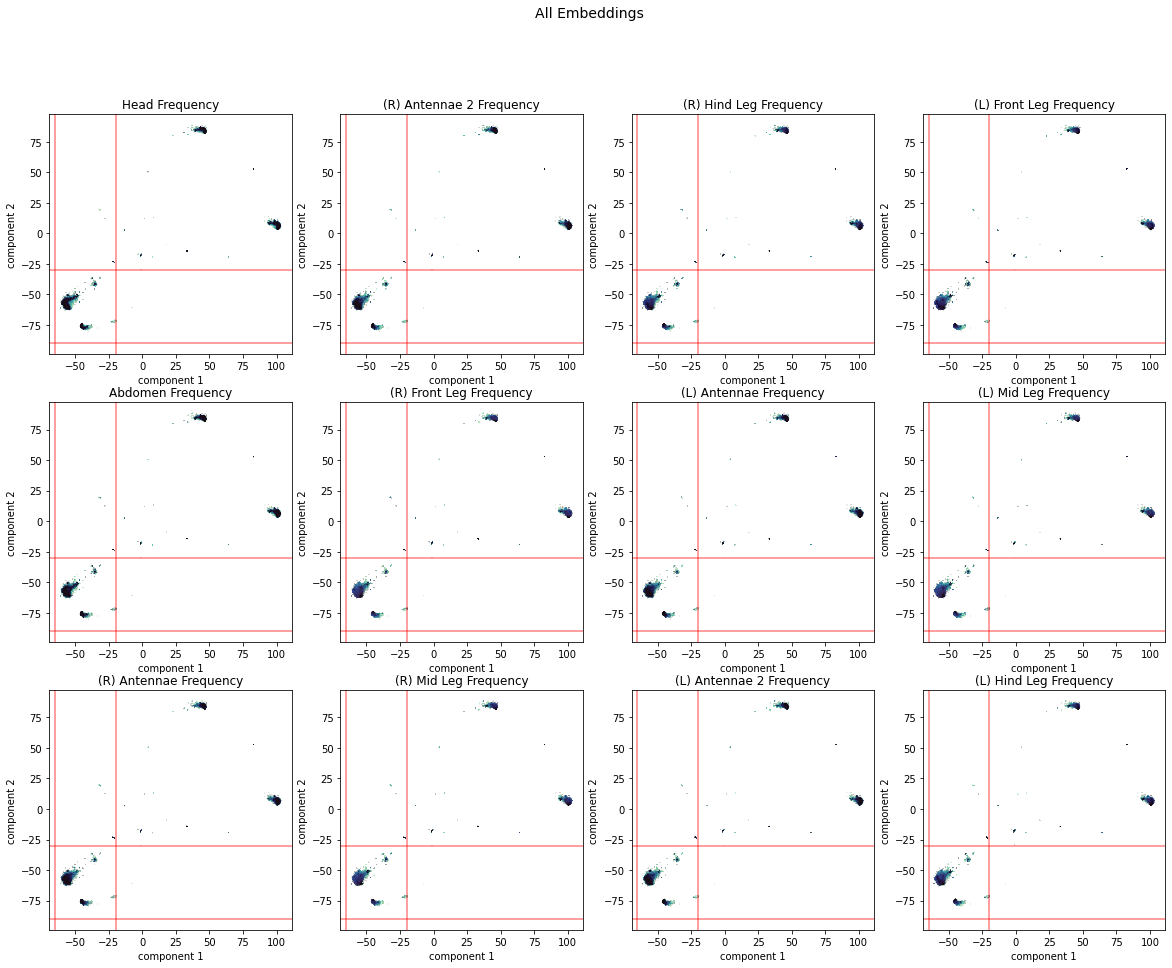

In [31]:
# figures
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for angle_idx in tqdm(range(12)):
    fig_title = f"{config['angle_labels'][angle_idx]} Frequency"
    freq_cluster_colors = np.array([freq_color_palette[f] for f in max_freq_idx[:,angle_idx]])
    ax[angle_idx%3, angle_idx//3].scatter(all_embed[:,0], all_embed[:,1], 
                                          color=freq_cluster_colors, alpha=0.005, s=0.5)
    ax[angle_idx%3, angle_idx//3].set(xlabel='component 1', ylabel='component 2', title=fig_title)
    ax[angle_idx%3, angle_idx//3].axhline(y=-90, color='red', alpha=0.5)
    ax[angle_idx%3, angle_idx//3].axhline(y=-30, color='red', alpha=0.5)
    ax[angle_idx%3, angle_idx//3].axvline(x=-65, color='red', alpha=0.5)
    ax[angle_idx%3, angle_idx//3].axvline(x=-20, color='red', alpha=0.5)
    
plt.suptitle("All Embeddings", fontsize=14)
plt.show()

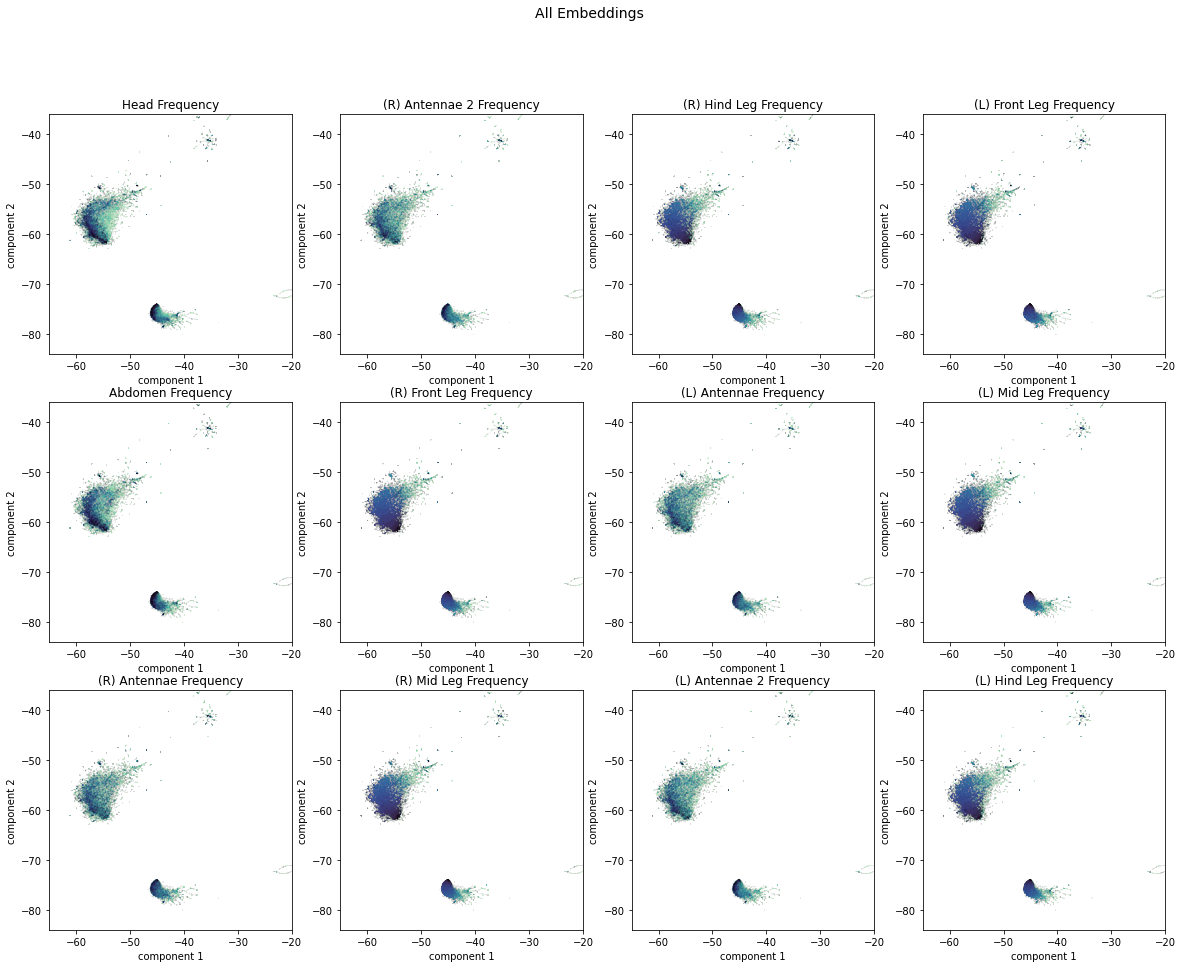

In [30]:
region_x_lim, region_y_lim = (-65,-20), (-90,-30)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

# figures
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for angle_idx in tqdm(range(12)):
    fig_title = f"{config['angle_labels'][angle_idx]} Frequency"
    freq_cluster_colors = np.array([freq_color_palette[f] for f in max_freq_idx[:,angle_idx]])
    ax[angle_idx%3, angle_idx//3].scatter(all_embed[:,0], all_embed[:,1], 
                                          color=freq_cluster_colors, alpha=0.005, s=0.5)
    ax[angle_idx%3, angle_idx//3].set(xlabel='component 1', ylabel='component 2', title=fig_title, 
                                      xlim=region_x_lim, ylim=region_y_lim)
    
plt.suptitle("All Embeddings", fontsize=14)
plt.show()

In [33]:
# checking postural / kinematic scaling
angle_pk_scale = np.max(angle_power, axis=(0,1))/np.max(angles, axis=(0))
limb_pk_scale = np.max(limb_power, axis=(0,1))/np.max(limbs, axis=(0))
adj_angles = angles*angle_pk_scale
adj_limbs = limbs*limb_pk_scale

In [34]:
angle_pk_scale

array([1.52019597, 1.60983968, 0.65329098, 0.70926514, 0.71802813,
       0.72927972, 0.65901491, 0.65735366, 0.65924177, 0.69263601,
       0.8200092 , 0.70475136])

In [35]:
limb_pk_scale

array([2.12811374, 1.92606646, 2.11270275, 2.07522934, 2.08900823,
       2.07736683, 2.06540107, 2.42159542, 2.2445999 , 2.20377784,
       2.22939808, 2.15060295, 2.14910714])

In [37]:
angle_power.shape

(1872138, 20, 12)

In [38]:
limb_power.shape

(1872138, 20, 13)

In [40]:
adj_angles.shape

(1872138, 12)

In [41]:
adj_limbs.shape

(1872138, 13)

In [44]:
np.max(angles, axis=0)

array([3.140625, 3.140625, 6.28125 , 6.28125 , 6.28125 , 6.28125 ,
       6.28125 , 6.28125 , 6.28125 , 6.28125 , 6.28125 , 6.28125 ])